In [134]:
# Drew Lesh
# 11/15/25
# IBM Data Analyst Capstone Project - Data Visualization
# Bubble Plots

In [135]:
import pandas as pd
import matplotlib.pyplot as plt


In [123]:
# load data
df = pd.read_csv('survey_data.csv')

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


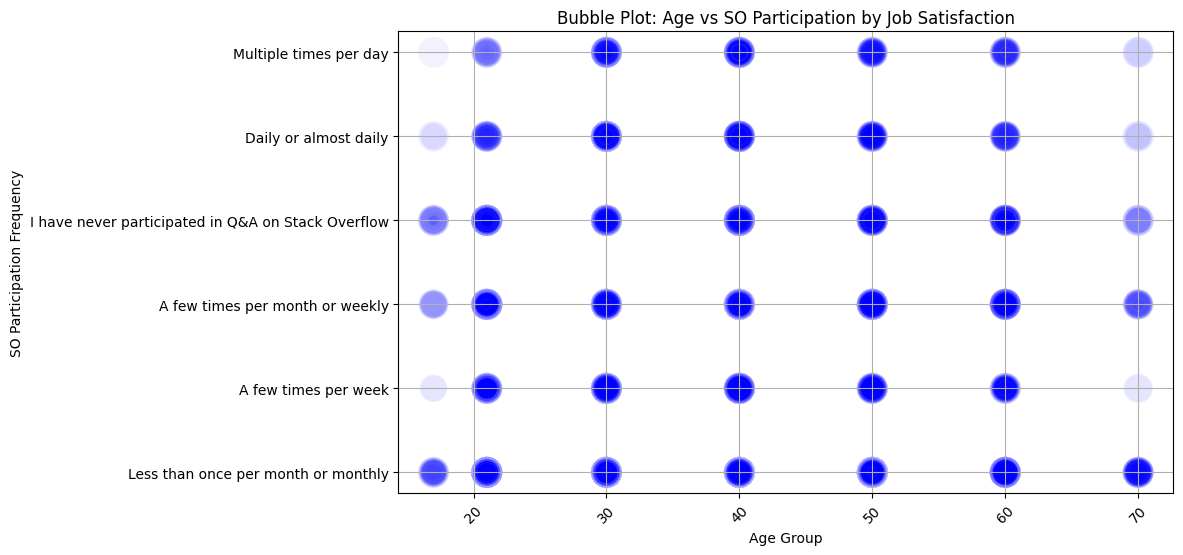

In [124]:
## Exploring Data Distributions Using Bubble Plots
# 1. Bubble Plot for Age and Frequency of Participation

df_1 = df[['Age', 'SOPartFreq', 'JobSat']].copy()
#df_1['JobSat'].value_counts()
#df_1['SOPartFreq'].value_counts()

# drop missing rows
df_1 = df_1.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# drop 'Prefer not to say' ages
df_1 = df_1[df_1['Age'] != 'Prefer not to say']

# map ages to numeric values
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df_1['Age_num'] = df_1['Age'].map(age_map)

# Bubble Plot
plt.figure(figsize=(10,6))
plt.scatter(
    df_1['Age_num'],
    df_1['SOPartFreq'],
    s=df_1['JobSat']*50,
    alpha=.05,
    c='blue',
    edgecolors='w'
)

plt.xlabel('Age Group')
plt.ylabel('SO Participation Frequency')
plt.title('Bubble Plot: Age vs SO Participation by Job Satisfaction')
plt.grid(True)
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

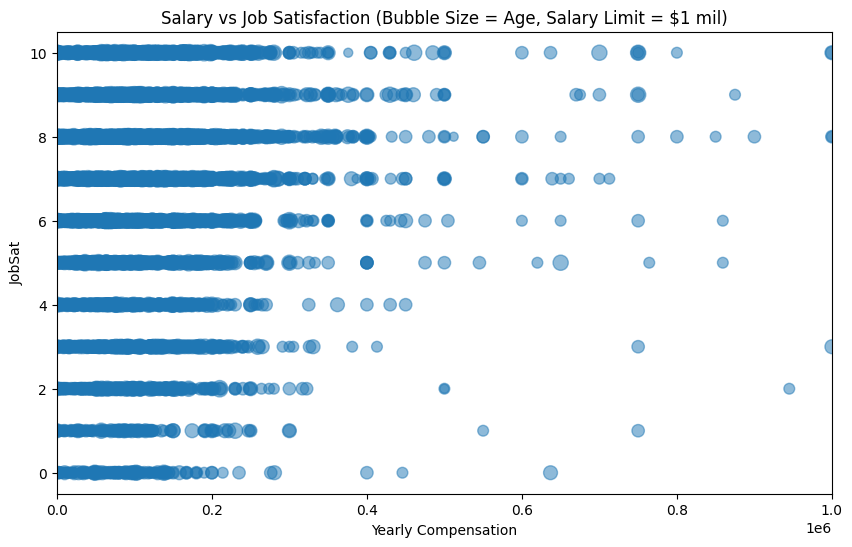

In [125]:
# 2. Bubble Plot for Compensation and Job Satisfaction

df_1_2 = df[['Age', 'JobSat', 'ConvertedCompYearly']].copy()

# map ages to numeric values
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df_1_2['Age_num'] = df_1_2['Age'].map(age_map)
df_1_2 = df_1_2.dropna(subset=['Age_num', 'ConvertedCompYearly', 'JobSat'])
#print(df_1_2['Age_num'].value_counts())
#print(df_1_2.isna().sum())

plt.figure(figsize=(10,6))
plt.scatter(
    df_1_2['ConvertedCompYearly'],
    df_1_2['JobSat'],
    s=df_1_2['Age_num']*2,
    alpha=0.5
)
plt.xlim(0, 1000000)
plt.xlabel('Yearly Compensation')
plt.ylabel('JobSat')
plt.title('Salary vs Job Satisfaction (Bubble Size = Age, Salary Limit = $1 mil)')
plt.show()

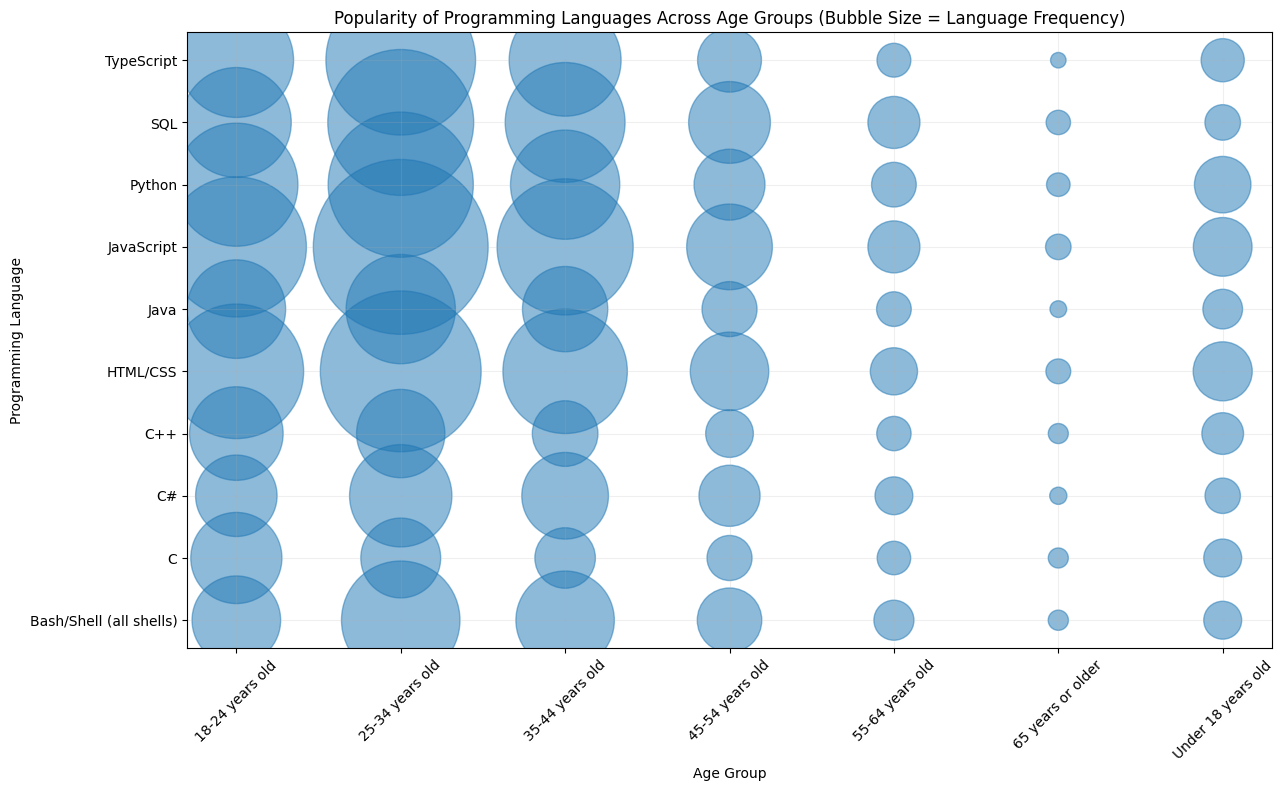

In [126]:
## Analyzing Relationships Using Bubble Plots
# 1. Bubble Plot of Technology Preferences by Age

# copy data
df_2 = df[['Age', 'LanguageHaveWorkedWith']].copy()

# drop columns
df_2 = df_2[df_2['Age'] != 'Prefer not to say']
df_2['LanguageHaveWorkedWith'] = df_2['LanguageHaveWorkedWith'].fillna(df_2['LanguageHaveWorkedWith'].mode()[0])
#df_2.isna().sum()

# Explode Langauges into each there own row
df_2['LanguageHaveWorkedWith'] = df_2['LanguageHaveWorkedWith'].str.split(';')
df_2 = df_2.explode('LanguageHaveWorkedWith')

# find frequencies of each column
freq = df_2.groupby(['Age', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')
top_langs = df_2['LanguageHaveWorkedWith'].value_counts().head(10).index
freq = freq[freq['LanguageHaveWorkedWith'].isin(top_langs)]

# Bubble PLot
plt.figure(figsize=(14,8))
plt.scatter(
    freq['Age'],
    freq['LanguageHaveWorkedWith'],
    s=freq['Frequency'],
    alpha=0.5
)
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.title('Popularity of Programming Languages Across Age Groups (Bubble Size = Language Frequency)')
plt.xticks(rotation=45)
plt.grid(alpha=0.2)
plt.show()

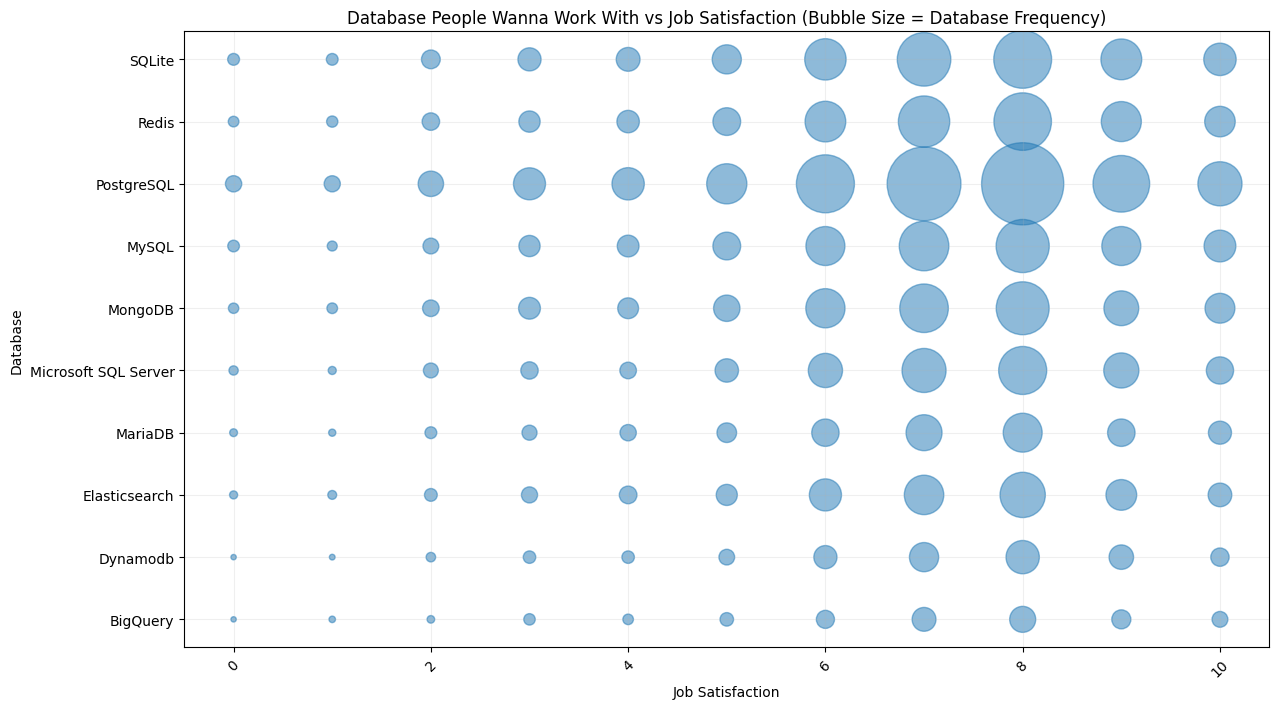

In [127]:
# 2. Bubble Plot for Preffered Databases vs. Job Satisfaction

df_2_2 = df[['DatabaseWantToWorkWith', 'JobSat']].copy()

# fix missing values
#df_2_2.isna().sum()
df_2_2 = df_2_2.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

# Explode DatabaseWantToWorkWith into individual rows
# Explode Langauges into each there own row
df_2_2['DatabaseWantToWorkWith'] = df_2_2['DatabaseWantToWorkWith'].str.split(';')
df_2_2 = df_2_2.explode('DatabaseWantToWorkWith')

# find frequencies of each column
freq_2 = df_2_2.groupby(['JobSat', 'DatabaseWantToWorkWith']).size().reset_index(name='Frequency')
top_dbs = df_2_2['DatabaseWantToWorkWith'].value_counts().head(10).index
freq_2 = freq_2[freq_2['DatabaseWantToWorkWith'].isin(top_dbs)]

# Bubble PLot
plt.figure(figsize=(14,8))
plt.scatter(
    freq_2['JobSat'],
    freq_2['DatabaseWantToWorkWith'],
    s=freq_2['Frequency'],
    alpha=0.5
)
plt.xlabel('Job Satisfaction')
plt.ylabel('Database')
plt.title('Database People Wanna Work With vs Job Satisfaction (Bubble Size = Database Frequency)')
plt.xticks(rotation=45)
plt.grid(alpha=0.2)
plt.show()

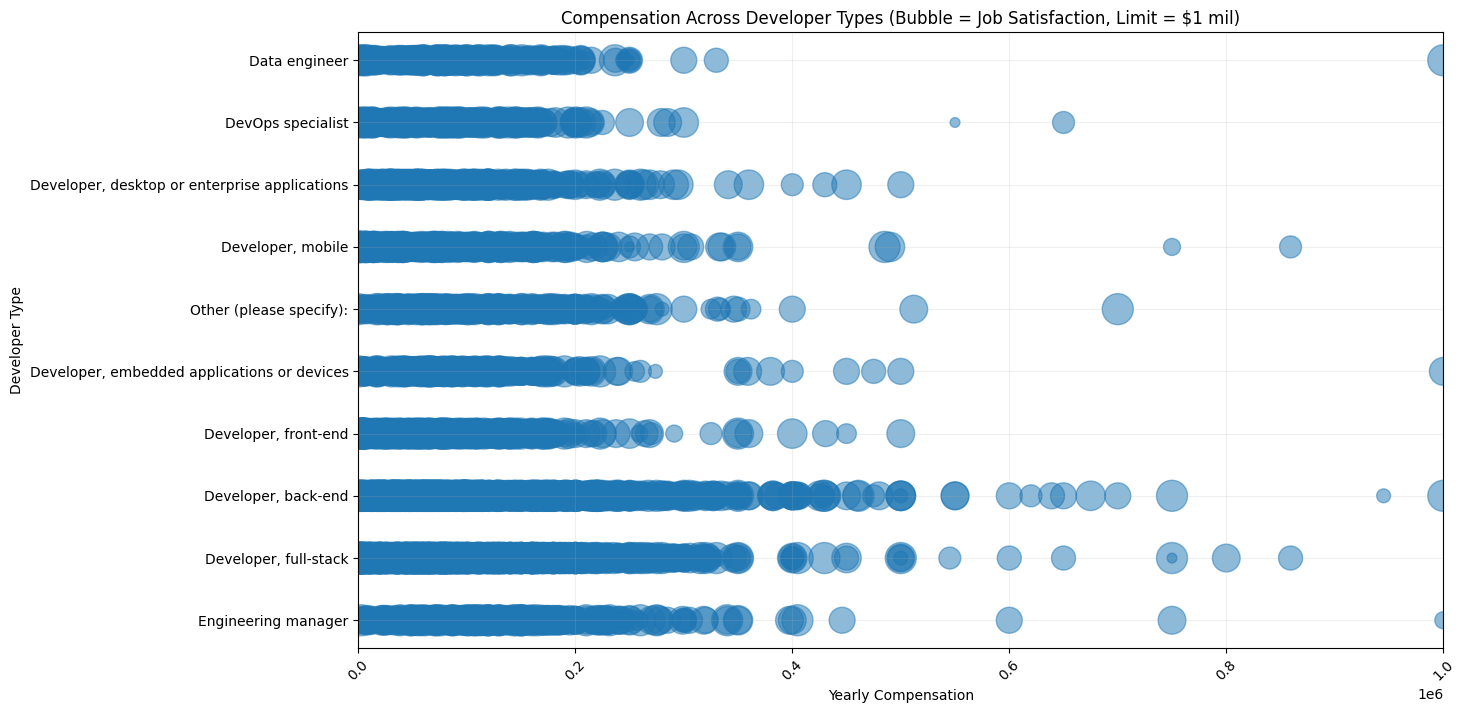

In [128]:
## Comparing Data using Bubble Plots
# 1. Bubble Plot for Compensation Across Developer Roles

df_3 = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna()

top_devs = df_3['DevType'].value_counts().head(10).index
df_3 = df_3[df_3['DevType'].isin(top_devs)]

plt.figure(figsize=(14,8))
plt.scatter(
    df_3['ConvertedCompYearly'],
    df_3['DevType'],
    s=df_3['JobSat']*50,
    alpha=0.5
)
plt.xlim(0, 1000000)
plt.xlabel('Yearly Compensation')
plt.ylabel('Developer Type')
plt.title('Compensation Across Developer Types (Bubble = Job Satisfaction, Limit = $1 mil)')
plt.xticks(rotation=45)
plt.grid(alpha=0.2)
plt.show()

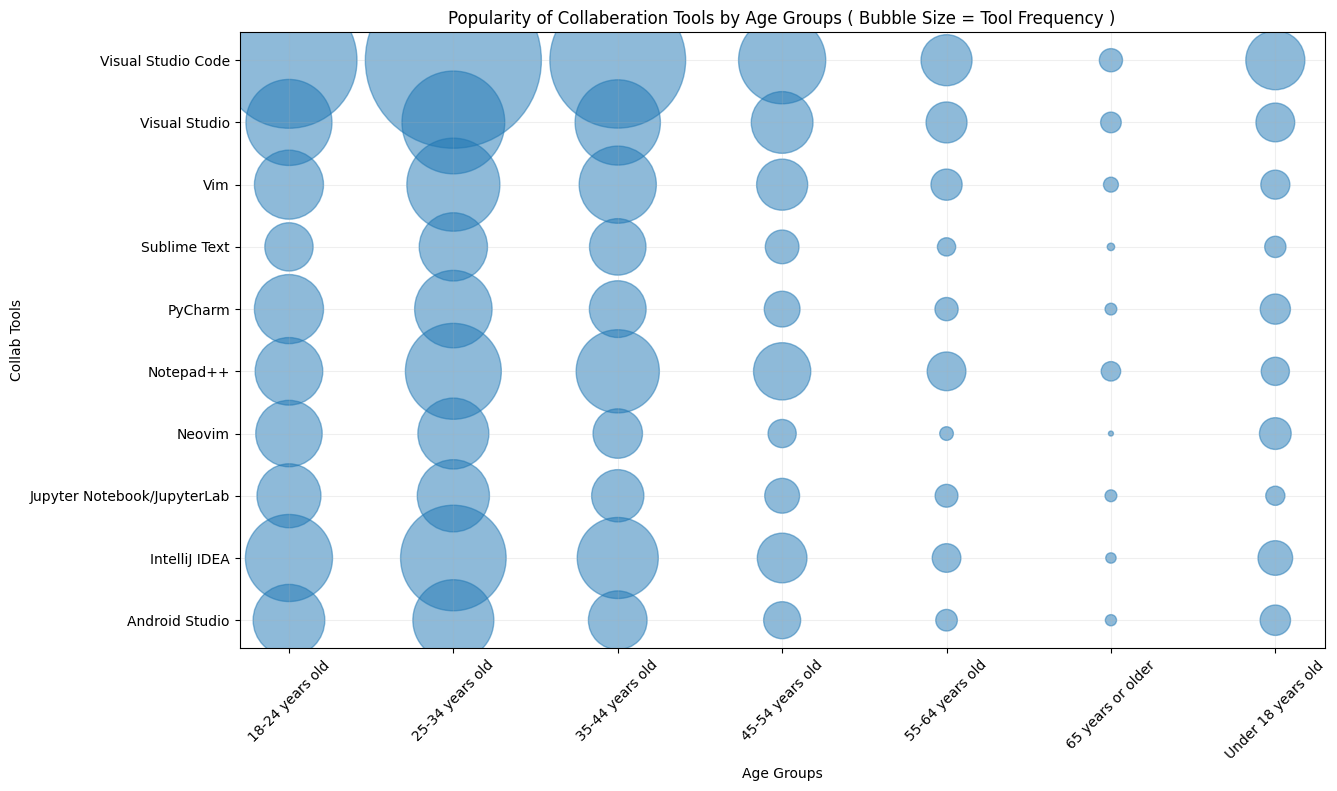

In [129]:
# 2. Bubble Plot for Collaberation Tools by Age

df_3_2 = df[['NEWCollabToolsHaveWorkedWith', 'Age']].dropna()
df_3_2 = df_3_2[df_3_2['Age'] != 'Prefer not to say']

#print(df_3_2['NEWCollabToolsHaveWorkedWith'].value_counts())

# Explode into individual rows
df_3_2['NEWCollabToolsHaveWorkedWith'] = df_3_2['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_3_2 = df_3_2.explode('NEWCollabToolsHaveWorkedWith')

# find frequencies of each column
freq_3 = df_3_2.groupby(['Age', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Frequency')
top_tools = df_3_2['NEWCollabToolsHaveWorkedWith'].value_counts().head(10).index
freq_3 = freq_3[freq_3['NEWCollabToolsHaveWorkedWith'].isin(top_tools)]

# Bubble PLot
plt.figure(figsize=(14,8))
plt.scatter(
    freq_3['Age'],
    freq_3['NEWCollabToolsHaveWorkedWith'],
    s=freq_3['Frequency'],
    alpha=0.5
)
plt.xlabel('Age Groups')
plt.ylabel('Collab Tools')
plt.title('Popularity of Collaberation Tools by Age Groups ( Bubble Size = Tool Frequency )')
plt.xticks(rotation=45)
plt.grid(alpha=0.2)
plt.show()

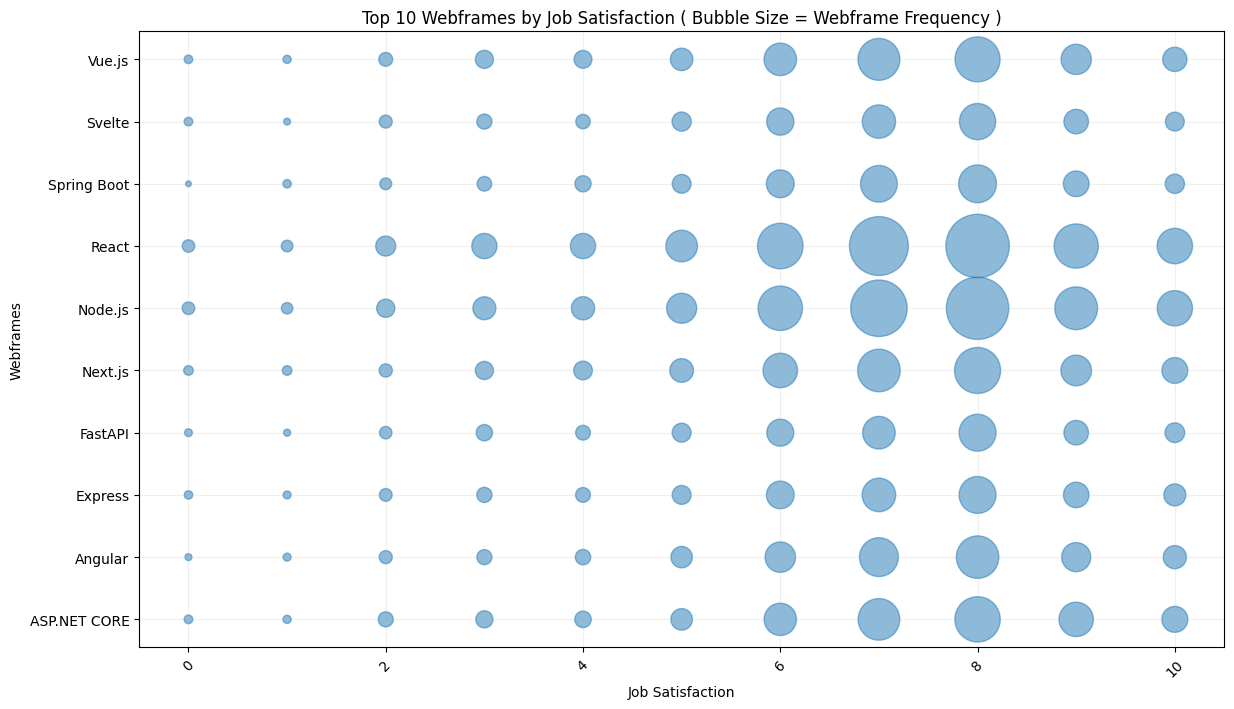

In [130]:
## Visualizing Technology Trends Using Bubble Plots
# Bubble Plot for Preferred Frameworks and Job Satisfaction

df_4 = df[['WebframeWantToWorkWith', 'JobSat']].copy()

df_4 = df_4.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Explode into individual rows
df_4['WebframeWantToWorkWith'] = df_4['WebframeWantToWorkWith'].str.split(';')
df_4 = df_4.explode('WebframeWantToWorkWith')

# find frequencies of each column
freq_4 = df_4.groupby(['JobSat', 'WebframeWantToWorkWith']).size().reset_index(name='Frequency')
top_wf = df_4['WebframeWantToWorkWith'].value_counts().head(10).index
freq_4 = freq_4[freq_4['WebframeWantToWorkWith'].isin(top_wf)]

# Bubble PLot
plt.figure(figsize=(14,8))
plt.scatter(
    freq_4['JobSat'],
    freq_4['WebframeWantToWorkWith'],
    s=freq_4['Frequency'],
    alpha=0.5
)
plt.xlabel('Job Satisfaction')
plt.ylabel('Webframes')
plt.title('Top 10 Webframes by Job Satisfaction ( Bubble Size = Webframe Frequency )')
plt.xticks(rotation=45)
plt.grid(alpha=0.2)
plt.show()

       Country          LanguageAdmired  Frequency
0  Afghanistan                      Ada          7
1  Afghanistan                     Apex          3
2  Afghanistan                 Assembly          5
3  Afghanistan  Bash/Shell (all shells)         10
4  Afghanistan                        C          6


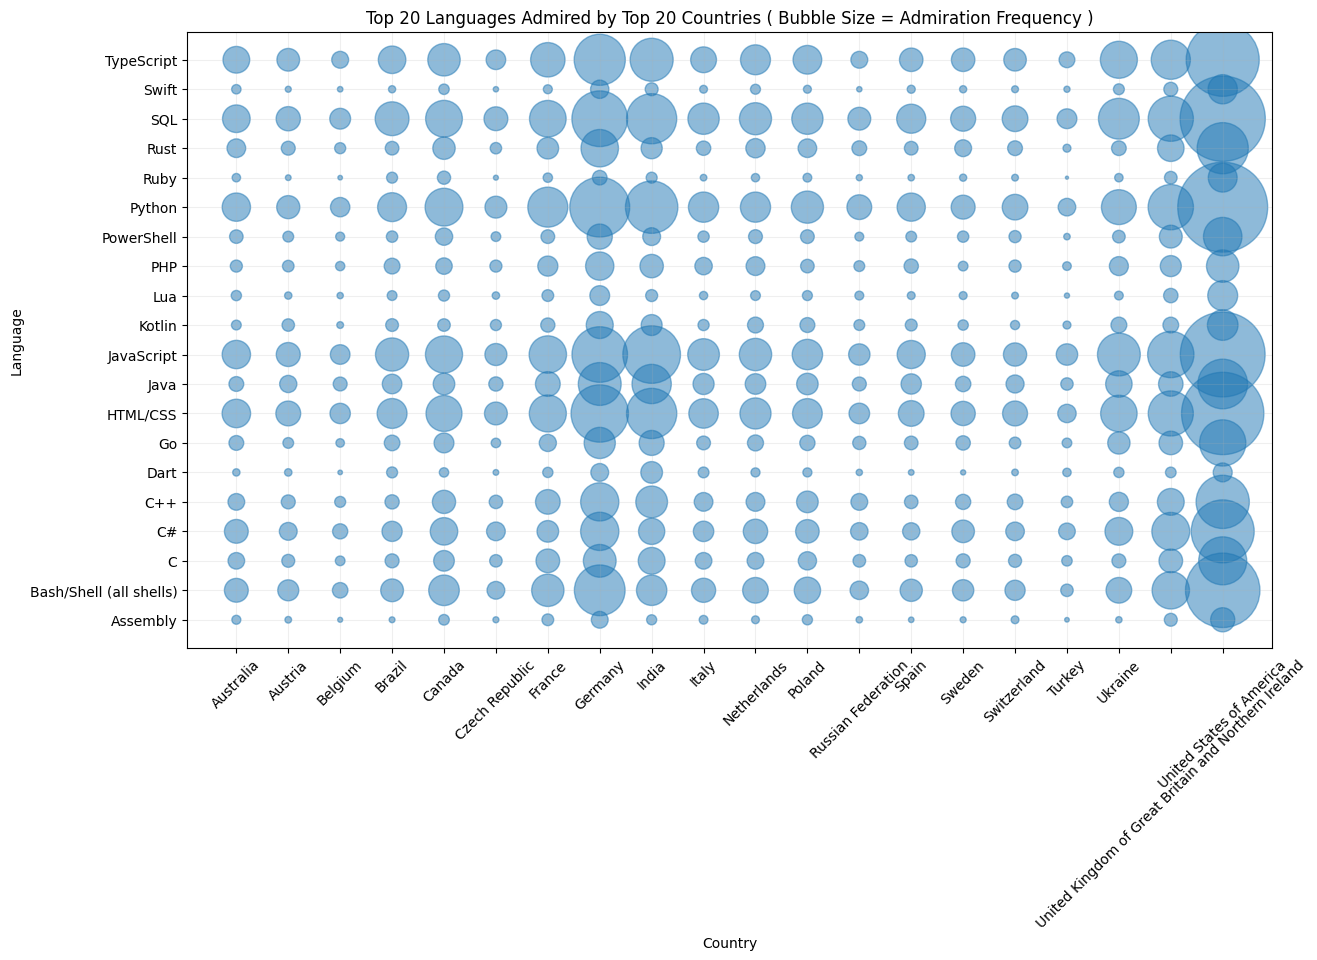

In [131]:
# 2. Bubble Plot for Admired Technologies Across Countries

df_4_2 = df[['LanguageAdmired', 'Country']].copy()
df_4_2 = df_4_2.dropna(subset=['Country', 'LanguageAdmired'])

# Explode into individual rows
df_4_2['LanguageAdmired'] = df_4_2['LanguageAdmired'].str.split(';')
df_4_2 = df_4_2.explode('LanguageAdmired')

# groupby frequencies
freq_4_2 = df_4_2.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='Frequency')
print(freq_4_2.head())
top_langad = df_4_2['LanguageAdmired'].value_counts().head(20).index
top_country = df_4_2['Country'].value_counts().head(20).index
freq_4_2 = freq_4_2[freq_4_2['LanguageAdmired'].isin(top_langad)]
freq_4_2 = freq_4_2[freq_4_2['Country'].isin(top_country)]

# Bubble PLot
plt.figure(figsize=(14,8))
plt.scatter(
    freq_4_2['Country'],
    freq_4_2['LanguageAdmired'],
    s=freq_4_2['Frequency'],
    alpha=0.5
)
plt.xlabel('Country')
plt.ylabel('Language')
plt.title('Top 20 Languages Admired by Top 20 Countries ( Bubble Size = Admiration Frequency )')
plt.xticks(rotation=45)
plt.grid(alpha=0.2)
plt.show()